# Books Recommender System

In [1]:
import pandas as pd
import numpy as np

# Data Viz.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style('darkgrid')

In [3]:
books = pd.read_csv('BX-Books.csv',delimiter=';',error_bad_lines=False,encoding='latin-1')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\Sarvesh Joshi\Downloads\Anaconda3\lib\site-packages\IPython\core\

In [4]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
books.dropna(inplace=True)

In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271354 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271354 non-null  object
 1   Book-Title           271354 non-null  object
 2   Book-Author          271354 non-null  object
 3   Year-Of-Publication  271354 non-null  object
 4   Publisher            271354 non-null  object
 5   Image-URL-S          271354 non-null  object
 6   Image-URL-M          271354 non-null  object
 7   Image-URL-L          271354 non-null  object
dtypes: object(8)
memory usage: 18.6+ MB


In [7]:
users = pd.read_csv('BX-Users.csv',delimiter=';',error_bad_lines=False,encoding='latin-1')

In [8]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [10]:
ratings = pd.read_csv('BX-Book-Ratings.csv',delimiter=';',error_bad_lines=False,encoding='latin-1')

In [11]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [12]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [13]:
df = pd.merge(ratings,books,on='ISBN')

In [14]:
df

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031124,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031125,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031126,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031127,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [15]:
df.groupby('Book-Title')['Book-Rating'].mean()

Book-Title
 A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)    2.250000
 Always Have Popsicles                                                                                        0.000000
 Apple Magic (The Collector's series)                                                                         0.000000
 Ask Lily (Young Women of Faith: Lily Series, Book 5)                                                         8.000000
 Beyond IBM: Leadership Marketing and Finance for the 1990s                                                   0.000000
                                                                                                                ...   
Ã?Â?lpiraten.                                                                                                 0.000000
Ã?Â?rger mit Produkt X. Roman.                                                                                5.250000
Ã?Â?sterlich leben.                  

In [16]:
df.groupby('Book-Title')['Book-Rating'].mean().sort_values(ascending = False).head(10)

Book-Title
Coast to Coast Walk                                                          10.0
Love Precious Humanity: The Collected Wisdom Of Harry Palmer                 10.0
Njal's Saga (Penguin Classics)                                               10.0
West Virginia Atlas &amp; Gazetteer (West Virginia Atlas &amp; Gazetteer)    10.0
Flight of the Shadow                                                         10.0
The Student's Dictionary of Anglo-Saxon                                      10.0
HOORAY FOR YIDDISH                                                           10.0
An Album of Memories                                                         10.0
Iliada                                                                       10.0
West Point: The First 200 Years: The First 200 Years                         10.0
Name: Book-Rating, dtype: float64

In [17]:
df.groupby('Book-Title')['Book-Rating'].count()

Book-Title
 A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)    4
 Always Have Popsicles                                                                                        1
 Apple Magic (The Collector's series)                                                                         1
 Ask Lily (Young Women of Faith: Lily Series, Book 5)                                                         1
 Beyond IBM: Leadership Marketing and Finance for the 1990s                                                   1
                                                                                                             ..
Ã?Â?lpiraten.                                                                                                 2
Ã?Â?rger mit Produkt X. Roman.                                                                                4
Ã?Â?sterlich leben.                                                                          

In [18]:
df.groupby('Book-Title')['Book-Rating'].count().sort_values(ascending=False).head(10)

Book-Title
Wild Animus                                        2502
The Lovely Bones: A Novel                          1295
The Da Vinci Code                                   898
A Painted House                                     838
The Nanny Diaries: A Novel                          828
Bridget Jones's Diary                               815
The Secret Life of Bees                             774
Divine Secrets of the Ya-Ya Sisterhood: A Novel     740
The Red Tent (Bestselling Backlist)                 723
Angels &amp; Demons                                 670
Name: Book-Rating, dtype: int64

In [19]:
mean_ratings = pd.DataFrame(df.groupby('Book-Title')['Book-Rating'].mean())
mean_ratings.head()

,Book-Rating
Book-Title,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",2.25
Always Have Popsicles,0.00
Apple Magic (The Collector's series),0.00
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",8.00
Beyond IBM: Leadership Marketing and Finance for the 1990s,0.00


In [20]:
mean_ratings['No.-Of-Ratings'] = pd.DataFrame(df.groupby('Book-Title')['Book-Rating'].count())
mean_ratings.head()

,Book-Rating,No.-Of-Ratings
Book-Title,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",2.25,4
Always Have Popsicles,0.00,1
Apple Magic (The Collector's series),0.00,1
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",8.00,1
Beyond IBM: Leadership Marketing and Finance for the 1990s,0.00,1


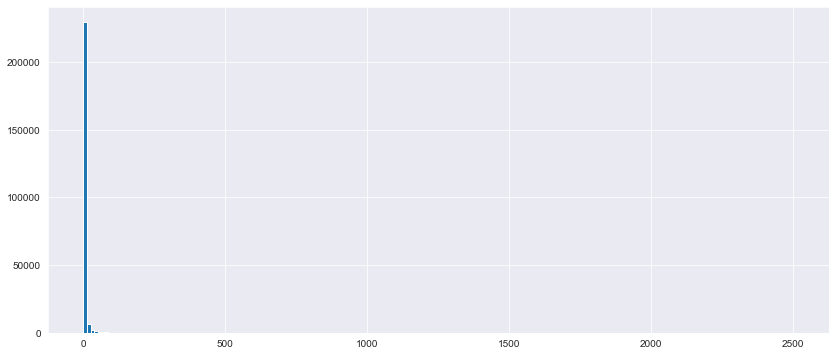

In [21]:
plt.figure(figsize=(14,6))
mean_ratings['No.-Of-Ratings'].hist(bins=200)
# plt.xlim(right=251)

(0.0, 500.0)

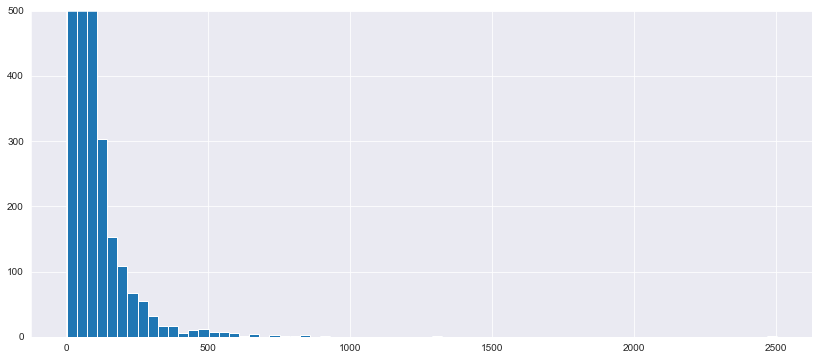

In [22]:
plt.figure(figsize=(14,6))
mean_ratings['No.-Of-Ratings'].hist(bins=70)
plt.ylim(top=500)

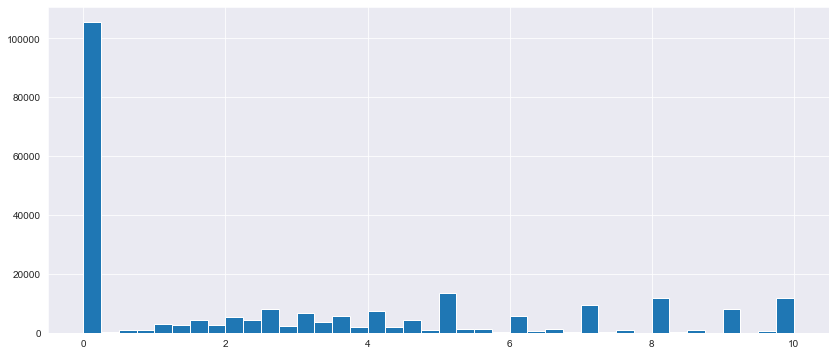

In [23]:
plt.figure(figsize=(14,6))
mean_ratings['Book-Rating'].hist(bins=40)

(0.0, 16000.0)

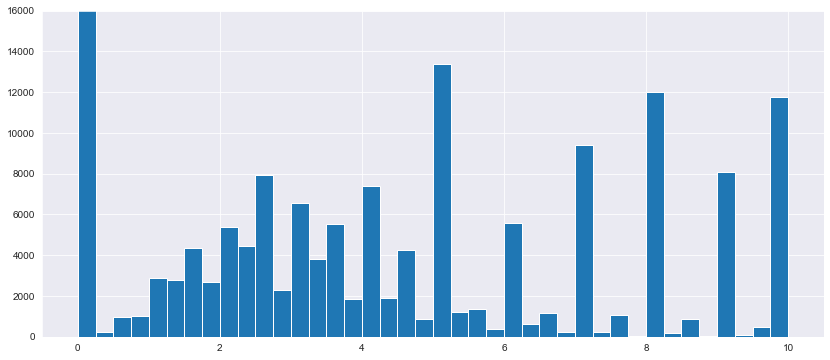

In [68]:
plt.figure(figsize=(14,6))
mean_ratings['Book-Rating'].hist(bins=40)
plt.ylim(top=16000)

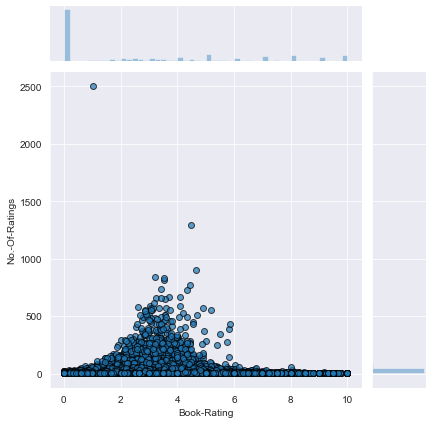

In [24]:
sns.jointplot(x='Book-Rating',y='No.-Of-Ratings',data=mean_ratings,alpha=0.7,edgecolor='k')

In [25]:
book_mat = df[:100000].pivot_table(values='Book-Rating',index='User-ID',columns='Book-Title')
book_mat.head()

Book-Title,007 El Mundo Nunca Es Suficiente,01-01-00: The Novel of the Millennium,101 Dalmatians,101 Experiments in the Philosophy of Everyday Life,101 Great Resumes,1421 : The Year China Discovered America,1st to Die: A Novel,21 Dog Years : Doing Time @ Amazon.com,24 Hours,"28 Barbary Lane : A \Tales of the City\"" Omnibus""",...,"You're Not Elected, Charlie Brown",Your Finances in Changing Times (The Christian Financial Concepts Series),"Your Life in Your Hands: Understanding, Preventing and Overcoming Breast Cancer",Your Personal Trainer,Your Second Child,Zen Essence : The Science of Freedom (Shambhala Pocket Classics),"Zentak, tome 1 : La Passe des Argonautes",Zuiderkruis: Roman,"\ Lamb to the Slaughter and Other Stories (Penguin 60s S.)""",Â¡No bajes al sÃ³tano! (EscalofrÃ­os No. 2)
User-ID,,,,,,,,,,,,,,,,,,,,,
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
mean_ratings.sort_values('No.-Of-Ratings',ascending=False).head(10)

,Book-Rating,No.-Of-Ratings
Book-Title,,
Wild Animus,1.019584,2502
The Lovely Bones: A Novel,4.468726,1295
The Da Vinci Code,4.642539,898
A Painted House,3.231504,838
The Nanny Diaries: A Novel,3.530193,828
Bridget Jones's Diary,3.527607,815
The Secret Life of Bees,4.447028,774
Divine Secrets of the Ya-Ya Sisterhood: A Novel,3.437838,740
The Red Tent (Bestselling Backlist),4.334716,723


In [55]:
mean_ratings.sort_values('No.-Of-Ratings',ascending=False).head(60)

,Book-Rating,No.-Of-Ratings
Book-Title,,
Wild Animus,1.019584,2502
The Lovely Bones: A Novel,4.468726,1295
The Da Vinci Code,4.642539,898
A Painted House,3.231504,838
The Nanny Diaries: A Novel,3.530193,828
Bridget Jones's Diary,3.527607,815
The Secret Life of Bees,4.447028,774
Divine Secrets of the Ya-Ya Sisterhood: A Novel,3.437838,740
The Red Tent (Bestselling Backlist),4.334716,723


In [26]:
da_vinci_code_ratings = book_mat['The Da Vinci Code']
da_vinci_code_ratings[da_vinci_code_ratings.isnull() == False].count()

883

In [56]:
harry_potter_cos_ratings = book_mat['Harry Potter and the Chamber of Secrets (Book 2)']

In [57]:
testament_ratings = book_mat['The Testament']

In [28]:
bridget_jones_ratings = book_mat['Bridget Jones\'s Diary']

In [29]:
similar_to_davinci = book_mat.corrwith(da_vinci_code_ratings)
similar_to_bridget = book_mat.corrwith(bridget_jones_ratings)

C:\Users\Sarvesh Joshi\Downloads\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Sarvesh Joshi\Downloads\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [58]:
similar_to_hp = book_mat.corrwith(harry_potter_cos_ratings)
similar_to_testament = book_mat.corrwith(testament_ratings)

C:\Users\Sarvesh Joshi\Downloads\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Sarvesh Joshi\Downloads\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [30]:
corr_da_vinci = pd.DataFrame(similar_to_davinci,columns=['Correlation'])
corr_da_vinci.dropna(inplace=True)
corr_da_vinci.head()

,Correlation
Book-Title,
01-01-00: The Novel of the Millennium,0.382360
1st to Die: A Novel,0.176690
21 Dog Years : Doing Time @ Amazon.com,0.739762
24 Hours,0.395340
"28 Barbary Lane : A \Tales of the City\"" Omnibus""",1.000000


In [31]:
corr_da_vinci.sort_values('Correlation',ascending=False).head(10)

,Correlation
Book-Title,
Midnight Runner,1.0
A Little Help from Above,1.0
Cold Case,1.0
The Complete Indoor Gardener,1.0
No Pasaran! El Videojuego,1.0
Le Parfum : Histoire d'un meurtrier,1.0
Ender's Game (Ender Wiggins Saga (Paperback)),1.0
Hunting Season (Anna Pigeon Novels (Paperback)),1.0
China Men (Vintage International (Paperback)),1.0


In [35]:
corr_da_vinci = corr_da_vinci.join(mean_ratings['No.-Of-Ratings'])

In [38]:
corr_da_vinci.head()

,Correlation,No.-Of-Ratings
Book-Title,,
01-01-00: The Novel of the Millennium,0.382360,22
1st to Die: A Novel,0.176690,509
21 Dog Years : Doing Time @ Amazon.com,0.739762,13
24 Hours,0.395340,106
"28 Barbary Lane : A \Tales of the City\"" Omnibus""",1.000000,4


In [43]:
corr_da_vinci[corr_da_vinci['No.-Of-Ratings']>300].sort_values('Correlation',ascending=False).head(10)

,Correlation,No.-Of-Ratings
Book-Title,,
The Da Vinci Code,1.000000,898
Mystic River,0.497376,362
The Beach House,0.450657,435
Disclosure,0.342591,318
The Rainmaker,0.322627,501
The King of Torts,0.318176,458
Dreamcatcher,0.316083,481
She's Come Undone (Oprah's Book Club),0.316030,468
The Horse Whisperer,0.314737,507


In [59]:
corr_hp = pd.DataFrame(similar_to_hp,columns=['Correlation'])
corr_hp.dropna(inplace=True)

In [60]:
corr_hp = corr_hp.join(mean_ratings['No.-Of-Ratings'])

In [63]:
corr_hp[corr_hp['No.-Of-Ratings']>250].sort_values('Correlation',ascending=False).head(10)

,Correlation,No.-Of-Ratings
Book-Title,,
Harry Potter and the Chamber of Secrets (Book 2),1.000000,556
The Green Mile,0.654654,264
The Notebook,0.646521,650
Harry Potter and the Sorcerer's Stone (Book 1),0.564655,278
Seabiscuit: An American Legend,0.563427,275
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),0.547920,575
Bridget Jones's Diary,0.546350,815
Disclosure,0.544071,318
Harry Potter and the Prisoner of Azkaban (Book 3),0.537840,428


In [64]:
corr_testament = pd.DataFrame(similar_to_testament,columns=['Correlation'])
corr_testament.dropna(inplace=True)
corr_testament = corr_testament.join(mean_ratings['No.-Of-Ratings'])

In [65]:
corr_testament[corr_testament['No.-Of-Ratings']>300].sort_values('Correlation',ascending=False).head(10)

,Correlation,No.-Of-Ratings
Book-Title,,
The Testament,1.000000,617
The Beach House,0.691720,435
Disclosure,0.655571,318
Dreamcatcher,0.630931,481
The Summons,0.483959,655
A Prayer for Owen Meany,0.479690,413
2nd Chance,0.469106,356
The Partner,0.459631,478
The Street Lawyer,0.442667,545


In [44]:
corr_bridget = pd.DataFrame(similar_to_bridget,columns=['Correlation'])
corr_bridget.dropna(inplace=True)

In [45]:
corr_bridget = corr_bridget.join(mean_ratings['No.-Of-Ratings'])

In [49]:
corr_bridget[corr_bridget['No.-Of-Ratings']>300].sort_values('Correlation',ascending=False).head(10)

,Correlation,No.-Of-Ratings
Book-Title,,
Bridget Jones's Diary,1.000000,815
The Catcher in the Rye,0.746434,449
The Client,0.644942,483
Disclosure,0.636819,318
Harry Potter and the Chamber of Secrets (Book 2),0.546350,556
The Poisonwood Bible: A Novel,0.503956,494
The Notebook,0.487674,650
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),0.460246,575
Mystic River,0.446516,362


# Done